### rapiDOS v.0.5.1 -- (build Feb. - 19 - 2018) -- 


# Script Inputs

In [1]:
# from rapiDOS import rapiDOS
from dft_post_analysis.rapiDOS.rapiDOS import rapiDOS

data_folder = "/home/raulf2012/__temp__/irox_bulk_systems/IrO3/_2"
out_folder = "out_data"

rapiDOS(
    data_folder=data_folder,
    out_folder=out_folder,
    )

8 301 3.39264631
Spin unrestricted calculation:  True
19
Approx. band gap:  0.232 eVv


## Set environment

In [2]:
%matplotlib inline
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 20) # Set maximum number of col. df display.

# Check spin polarized calculations:
incar_file = open(os.path.join(data_folder, "INCAR"), "r")
ispin = 1  # Non spin polarised calculations.
for line in incar_file:
    if re.match("(.*)ISPIN(.*)2", line):
        ispin = 2 # For spin polarised calculations.

## Load data .csv files

In [3]:
total_dos_df = pd.read_csv(os.path.join(out_folder, 'TotalDOS.csv'))
pdos_df = pd.read_csv(os.path.join(out_folder, 'PDOS.csv'))
band_gap_df = pd.read_csv(os.path.join(out_folder, 'BandGap.csv'))

#### Approximate band gap:

In [4]:
band_gap = band_gap_df
band_gap_lower = band_gap['Lower Band Gap'][0]
band_gap_upper = band_gap['Upper Band Gap'][0]
print('Approx. Band Gap:',np.round(np.abs(band_gap['Band Gap'][0]),3), "eV")

Approx. Band Gap: 0.232 eV


## Example 1. Plot total DOS.

No handles with labels found to put in legend.


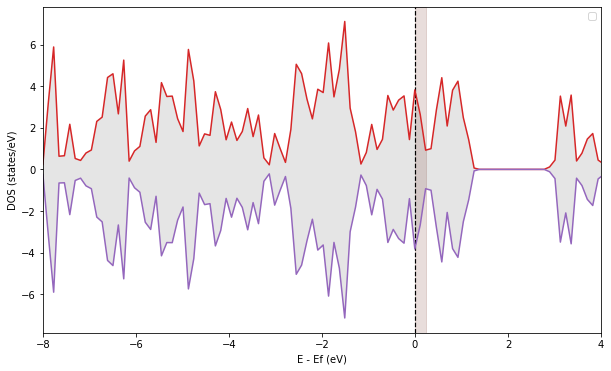

In [5]:
fig = plt.figure(figsize=(10.0,6.0)) # Create figure.
plt.axvline(x=[0.0], color='k', linestyle='--',linewidth=1.2) # Plot vertical line in Fermi.
plt.plot(total_dos_df['Energy (E-Ef)'],total_dos_df['Total DOS Spin Up'],color='C3') # Plot DOS spin up.
plt.fill_between(total_dos_df['Energy (E-Ef)'], 
                 0, total_dos_df['Total DOS Spin Up'],
                 facecolor='C7', alpha=0.2, interpolate=True) # Fill between spin up and down.
plt.axvspan(band_gap_lower, band_gap_upper, alpha=0.2, color='C5')

if ispin == 2:
    plt.plot(total_dos_df['Energy (E-Ef)'],-total_dos_df['Total DOS Spin Down'],color='C4') # Plot DOS spin down.
    plt.fill_between(total_dos_df['Energy (E-Ef)'], 
                 0, -total_dos_df['Total DOS Spin Up'],
                 facecolor='C7', alpha=0.2, interpolate=True) # Fill between spin up and down.
    
plt.legend() # Add legend to the plot.
plt.xlabel('E - Ef (eV)') # x axis label.
plt.ylabel('DOS (states/eV)') # x axis label.
plt.xlim([-8.0,4.0]) # Plot limits.

fig.savefig(os.path.join(out_folder, "Fig1.pdf")) # Save figure EPS.

Double check that the maximum DOS value of the total DOS is consistent with p4vasp:

In [6]:
max_dos = total_dos_df['Total DOS Spin Up'].max() 
print('Max DOS (using this script) = ', max_dos, 'states/eV')

Max DOS (using this script) =  7.1099999999999985 states/eV


## Example 2. PDOS: Plot total p$_z$ and d$_{z^2}$ states.

No handles with labels found to put in legend.


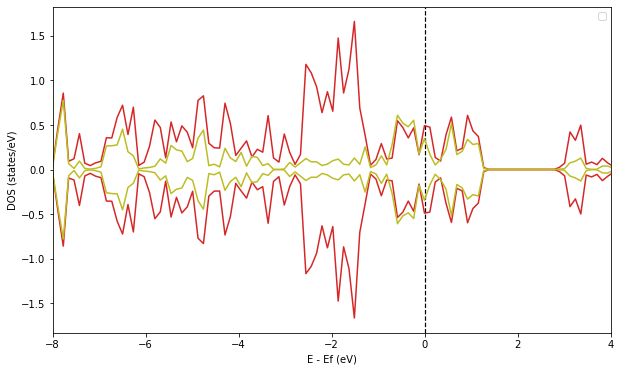

In [7]:
fig = plt.figure(figsize=(10.0,6.0)) # Create figure.
pdos_energy_index_df = pdos_df.set_index(['Energy (E-Ef)']) # Set index.
# Sum same orbitals for all atoms:
sum_orbitals_df = pdos_energy_index_df.groupby(pdos_energy_index_df.index).sum()

plt.axvline(x=[0.0], color='k', linestyle='--',linewidth=1.2) # Plot vertical line in Fermi.

# Spin up.
plt.plot(sum_orbitals_df['pz_up'],color='C3')
plt.plot(sum_orbitals_df['dz2_up'],color='C8')

# Spin down.
if ispin == 2:
    plt.plot(sum_orbitals_df['pz_down'],color='C3')
    plt.plot(sum_orbitals_df['dz2_down'],color='C8')

plt.legend() # Add legend to the plot.
plt.xlabel('E - Ef (eV)') # x axis label.
plt.ylabel('DOS (states/eV)') # x axis label.
plt.xlim([-8.0,4.0]) # Plot limits.

fig.savefig(os.path.join(out_folder, "Fig2.pdf")) # Save figure EPS.

## Example 3. PDOS: Plot $s$ states, $p$ states ($p$$_x$, $p$$_y$, $p$$_z$) and $d$ states ($d$$_{xy}$, $d$$_{yz}$, $d$$_{xz}$, $d$$_{z^2}$, $d$$_{x^2}$).

No handles with labels found to put in legend.


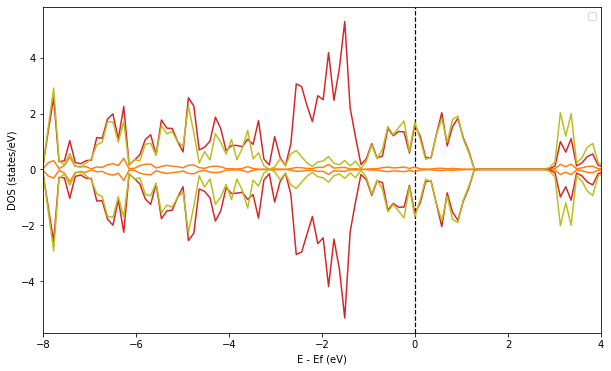

In [8]:
pdos_energy_index_df = pdos_df.set_index(['Energy (E-Ef)']) # Set index.
# Sum same orbitals for all atoms:
sum_orbitals_df = pdos_energy_index_df.groupby(pdos_energy_index_df.index).sum()
# Sum of orbitals for spin up:
sum_orbitals_df['Total p_up'] = sum_orbitals_df.apply(lambda row: row.px_up + row.py_up + row.pz_up, axis=1)
sum_orbitals_df['Total d_up'] = sum_orbitals_df.apply(lambda row: row.dxy_up + row.dyz_up + row.dxz_up + row.dz2_up + row.dx2_up, axis=1)


# Sum of orbitals for spin up:
if ispin == 2:
    sum_orbitals_df['Total p_down'] = sum_orbitals_df.apply(lambda row: row.px_down + row.py_down + row.pz_down, axis=1)
    sum_orbitals_df['Total d_down'] = sum_orbitals_df.apply(lambda row: row.dxy_down + row.dyz_down + row.dxz_down + row.dz2_down + row.dx2_down, axis=1)

# Plots:
fig = plt.figure(figsize=(10.0,6.0)) # Create figure.
plt.axvline(x=[0.0], color='k', linestyle='--',linewidth=1.2) # Plot vertical line in Fermi.

# Spin up:
plt.plot(sum_orbitals_df['s_up'],color='C1')
plt.plot(sum_orbitals_df['Total p_up'],color='C3')
plt.plot(sum_orbitals_df['Total d_up'],color='C8')

# Spin down:
if ispin == 2:
    plt.plot(sum_orbitals_df['s_down'],color='C1')
    plt.plot(sum_orbitals_df['Total p_down'],color='C3')
    plt.plot(sum_orbitals_df['Total d_down'],color='C8')

plt.legend() # Add legend to the plot.
plt.xlabel('E - Ef (eV)') # x axis label.
plt.ylabel('DOS (states/eV)') # x axis label.
plt.xlim([-8.0,4.0]) # Plot limits.
fig.savefig(os.path.join(out_folder, "Fig3.pdf")) # Save figure EPS.

## Example 4. PDOS: Plot states of a single atom (e.g. Cu$_2$).

Print list of atoms that one can select:

In [9]:
list_of_atoms = list(reversed(pdos_df['Atom Label'].unique()))
print('List of atoms: ', list_of_atoms)

List of atoms:  ['Ir1', 'Ir2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']


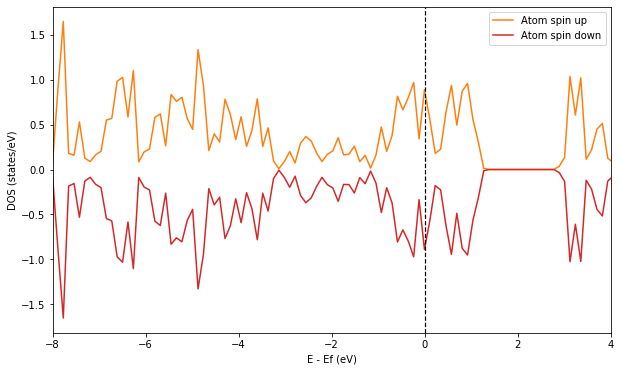

In [10]:
""" Select one atom from the previous list. Remember list_of_atoms[0] corresponds to Atom #1, 
list_of_atoms[1] to #2 ..."""

atom_selected = list_of_atoms[1]  # This is equivalent to atom_selected = 'Cu2' in this example.

pdos_energy_index_df = pdos_df.set_index(['Energy (E-Ef)']) # Set index.
only_atom_df = pdos_energy_index_df[pdos_energy_index_df['Atom Label']==atom_selected] # Select only one atom (e.g Cu2).
atom_spin_up_df = only_atom_df.filter(regex="up").sum(axis=1) # Filter, get all bands with spin up. Then, sum all orbitals.

if ispin == 2:
    atom_spin_down_df = only_atom_df.filter(regex="down").sum(axis=1) # Filter, get all bands with spin down. Then, sum all orbitals.

# Plots:
fig = plt.figure(figsize=(10.0,6.0)) # Create figure.

plt.plot(atom_spin_up_df,color='C1') # Atom spin up.

if ispin == 2:
    plt.plot(atom_spin_down_df,color='C3') # Atom spin down.

plt.axvline(x=[0.0], color='k', linestyle='--',linewidth=1.2) # Plot vertical line in Fermi.
plt.legend(['Atom spin up']) # Add manually legend to the plot.
if ispin == 2: plt.legend(['Atom spin up','Atom spin down']) # Add manually legend to the plot.
plt.xlabel('E - Ef (eV)') # x axis label.
plt.ylabel('DOS (states/eV)') # x axis label.
plt.xlim([-8.0,4.0]) # Plot limits.
fig.savefig(os.path.join(out_folder, "Fig4.pdf")) # Save figure EPS.

## Example 5. PDOS: Plot states for a individual elements and total DOS.

In [11]:
list_of_elements = list(reversed(pdos_df['Element'].unique()))
print('List of elements: ', list_of_elements)

List of elements:  ['Ir', 'O']


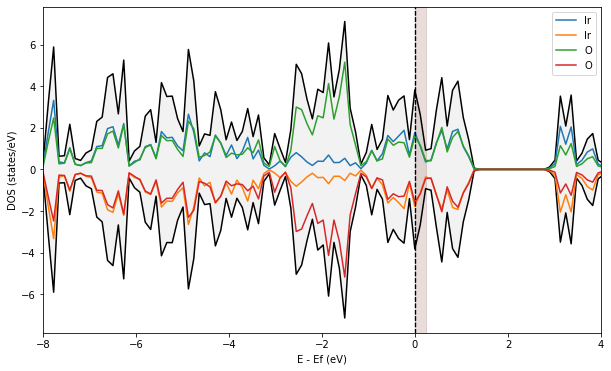

In [12]:
fig = plt.figure(figsize=(10.0,6.0)) # Create figure.

plt.plot(total_dos_df['Energy (E-Ef)'],total_dos_df['Total DOS Spin Up'],color='black') # Plot DOS spin up.
plt.fill_between(total_dos_df['Energy (E-Ef)'], 
                 0, total_dos_df['Total DOS Spin Up'],
                 facecolor='black', alpha=0.05, interpolate=True) # Fill between spin up and down.
plt.axvspan(band_gap_lower, band_gap_upper, alpha=0.2, color='C5')

if ispin == 2:
    plt.plot(total_dos_df['Energy (E-Ef)'],-total_dos_df['Total DOS Spin Down'],color='black') # Plot DOS spin down.
    plt.fill_between(total_dos_df['Energy (E-Ef)'], 
                 0, -total_dos_df['Total DOS Spin Down'],
                 facecolor='black', alpha=0.05, interpolate=True) # Fill between spin up and down.
        
for element_selected in list_of_elements:
    pdos_energy_index_df = pdos_df.set_index(['Energy (E-Ef)']) # Set index.
    only_element_df = pdos_energy_index_df[pdos_energy_index_df['Element']==element_selected] # Select only states for a given element.
    sum_element_df = only_element_df.groupby(only_element_df.index).sum() # Sum all the states for a given element.

    element_spin_up_df = sum_element_df.filter(regex="up").sum(axis=1) # Filter, get all bands with spin up. Then, sum all orbitals.

    if ispin == 2:
        element_spin_down_df = sum_element_df.filter(regex="down").sum(axis=1) # Filter, get all bands with spin down. Then, sum all orbitals.

    # Plots:
    plt.plot(element_spin_up_df, label=element_selected) # Atom spin up.

    if ispin == 2:
        plt.plot(element_spin_down_df, label=element_selected) # Atom spin down.

    plt.axvline(x=[0.0], color='k', linestyle='--',linewidth=1.2) # Plot vertical line in Fermi.

plt.xlabel('E - Ef (eV)') # x axis label.
plt.ylabel('DOS (states/eV)') # x axis label.
plt.xlim([-8.0, 4.0]) # Plot limits.
plt.legend() # Add manually legend to the plot.
fig.savefig(os.path.join(out_folder, "Fig5.pdf")) # Save figure EPS.